In [9]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv("Cardiotocographic.csv")

In [10]:
# 3.1: Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [11]:
# 3.2: Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [12]:
# 3.3: Handle missing values
# Filling missing values with the mean
df.fillna(df.mean(), inplace=True)

# Verify that missing values have been handled
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [13]:
# 3.4: Check for inconsistencies in data types
print("\nData types of each column:")
print(df.dtypes)



Data types of each column:
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [14]:
# 3.5: Detect and treat outliers (using IQR method for numerical columns)
numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}: {len(outliers)}")



Outliers in LB: 10

Outliers in AC: 43

Outliers in FM: 347

Outliers in UC: 13

Outliers in DL: 125

Outliers in DS: 141

Outliers in DP: 305

Outliers in ASTV: 10

Outliers in MSTV: 80

Outliers in ALTV: 318

Outliers in MLTV: 81

Outliers in Width: 10

Outliers in Tendency: 10

Outliers in NSP: 580


In [15]:
# 4.1: Provide a statistical summary for each variable
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001

In [17]:
# 4.2: Highlight interesting findings
# Finding mean and standard deviation of each variable
print("\nMean    Standard Deviation:")
print(df.mean())
print(df.std())


Mean    Standard Deviation:
LB          133.343598
AC            0.003219
FM            0.009894
UC            0.004391
DL            0.001895
DS            0.000003
DP            0.000175
ASTV         46.995984
MSTV          1.364378
ALTV         10.285964
MLTV          8.284887
Width        70.429260
Tendency      0.316371
NSP           1.304507
dtype: float64
LB          11.214328
AC           0.004370
FM           0.067540
UC           0.003340
DL           0.003343
DS           0.000141
DP           0.000836
ASTV        18.813973
MSTV         1.173632
ALTV        21.205041
MLTV         7.734356
Width       42.719161
Tendency     0.642424
NSP          0.641426
dtype: float64


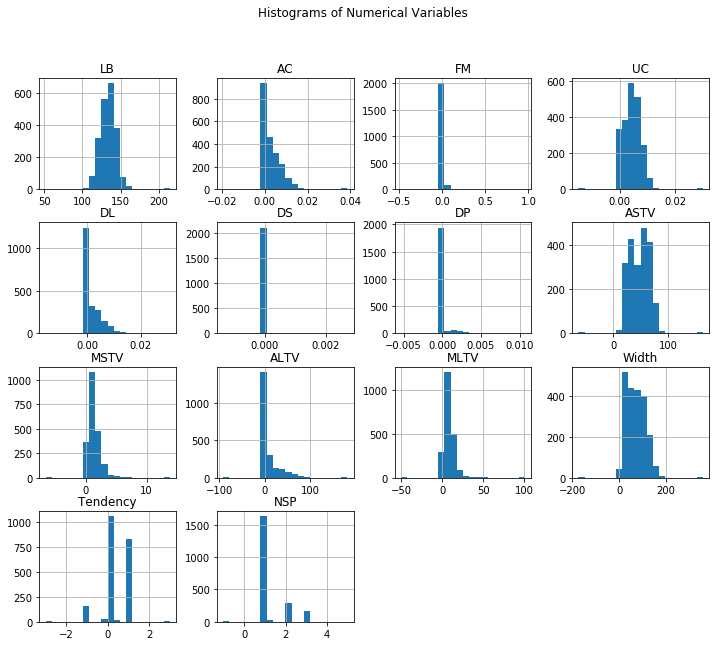

In [18]:
# Step 5: Data Visualization

# 5.1: Histograms for numerical variables
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Variables")
plt.show()


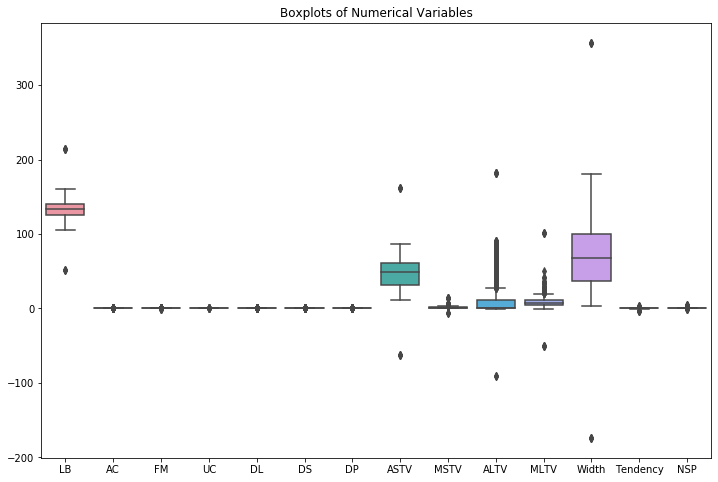

In [19]:
# 5.2: Boxplots for numerical variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Boxplots of Numerical Variables")
plt.show()

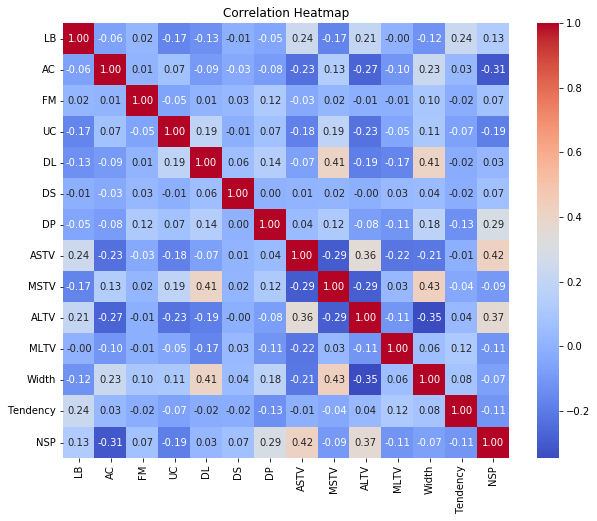

In [20]:
# 5.3: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

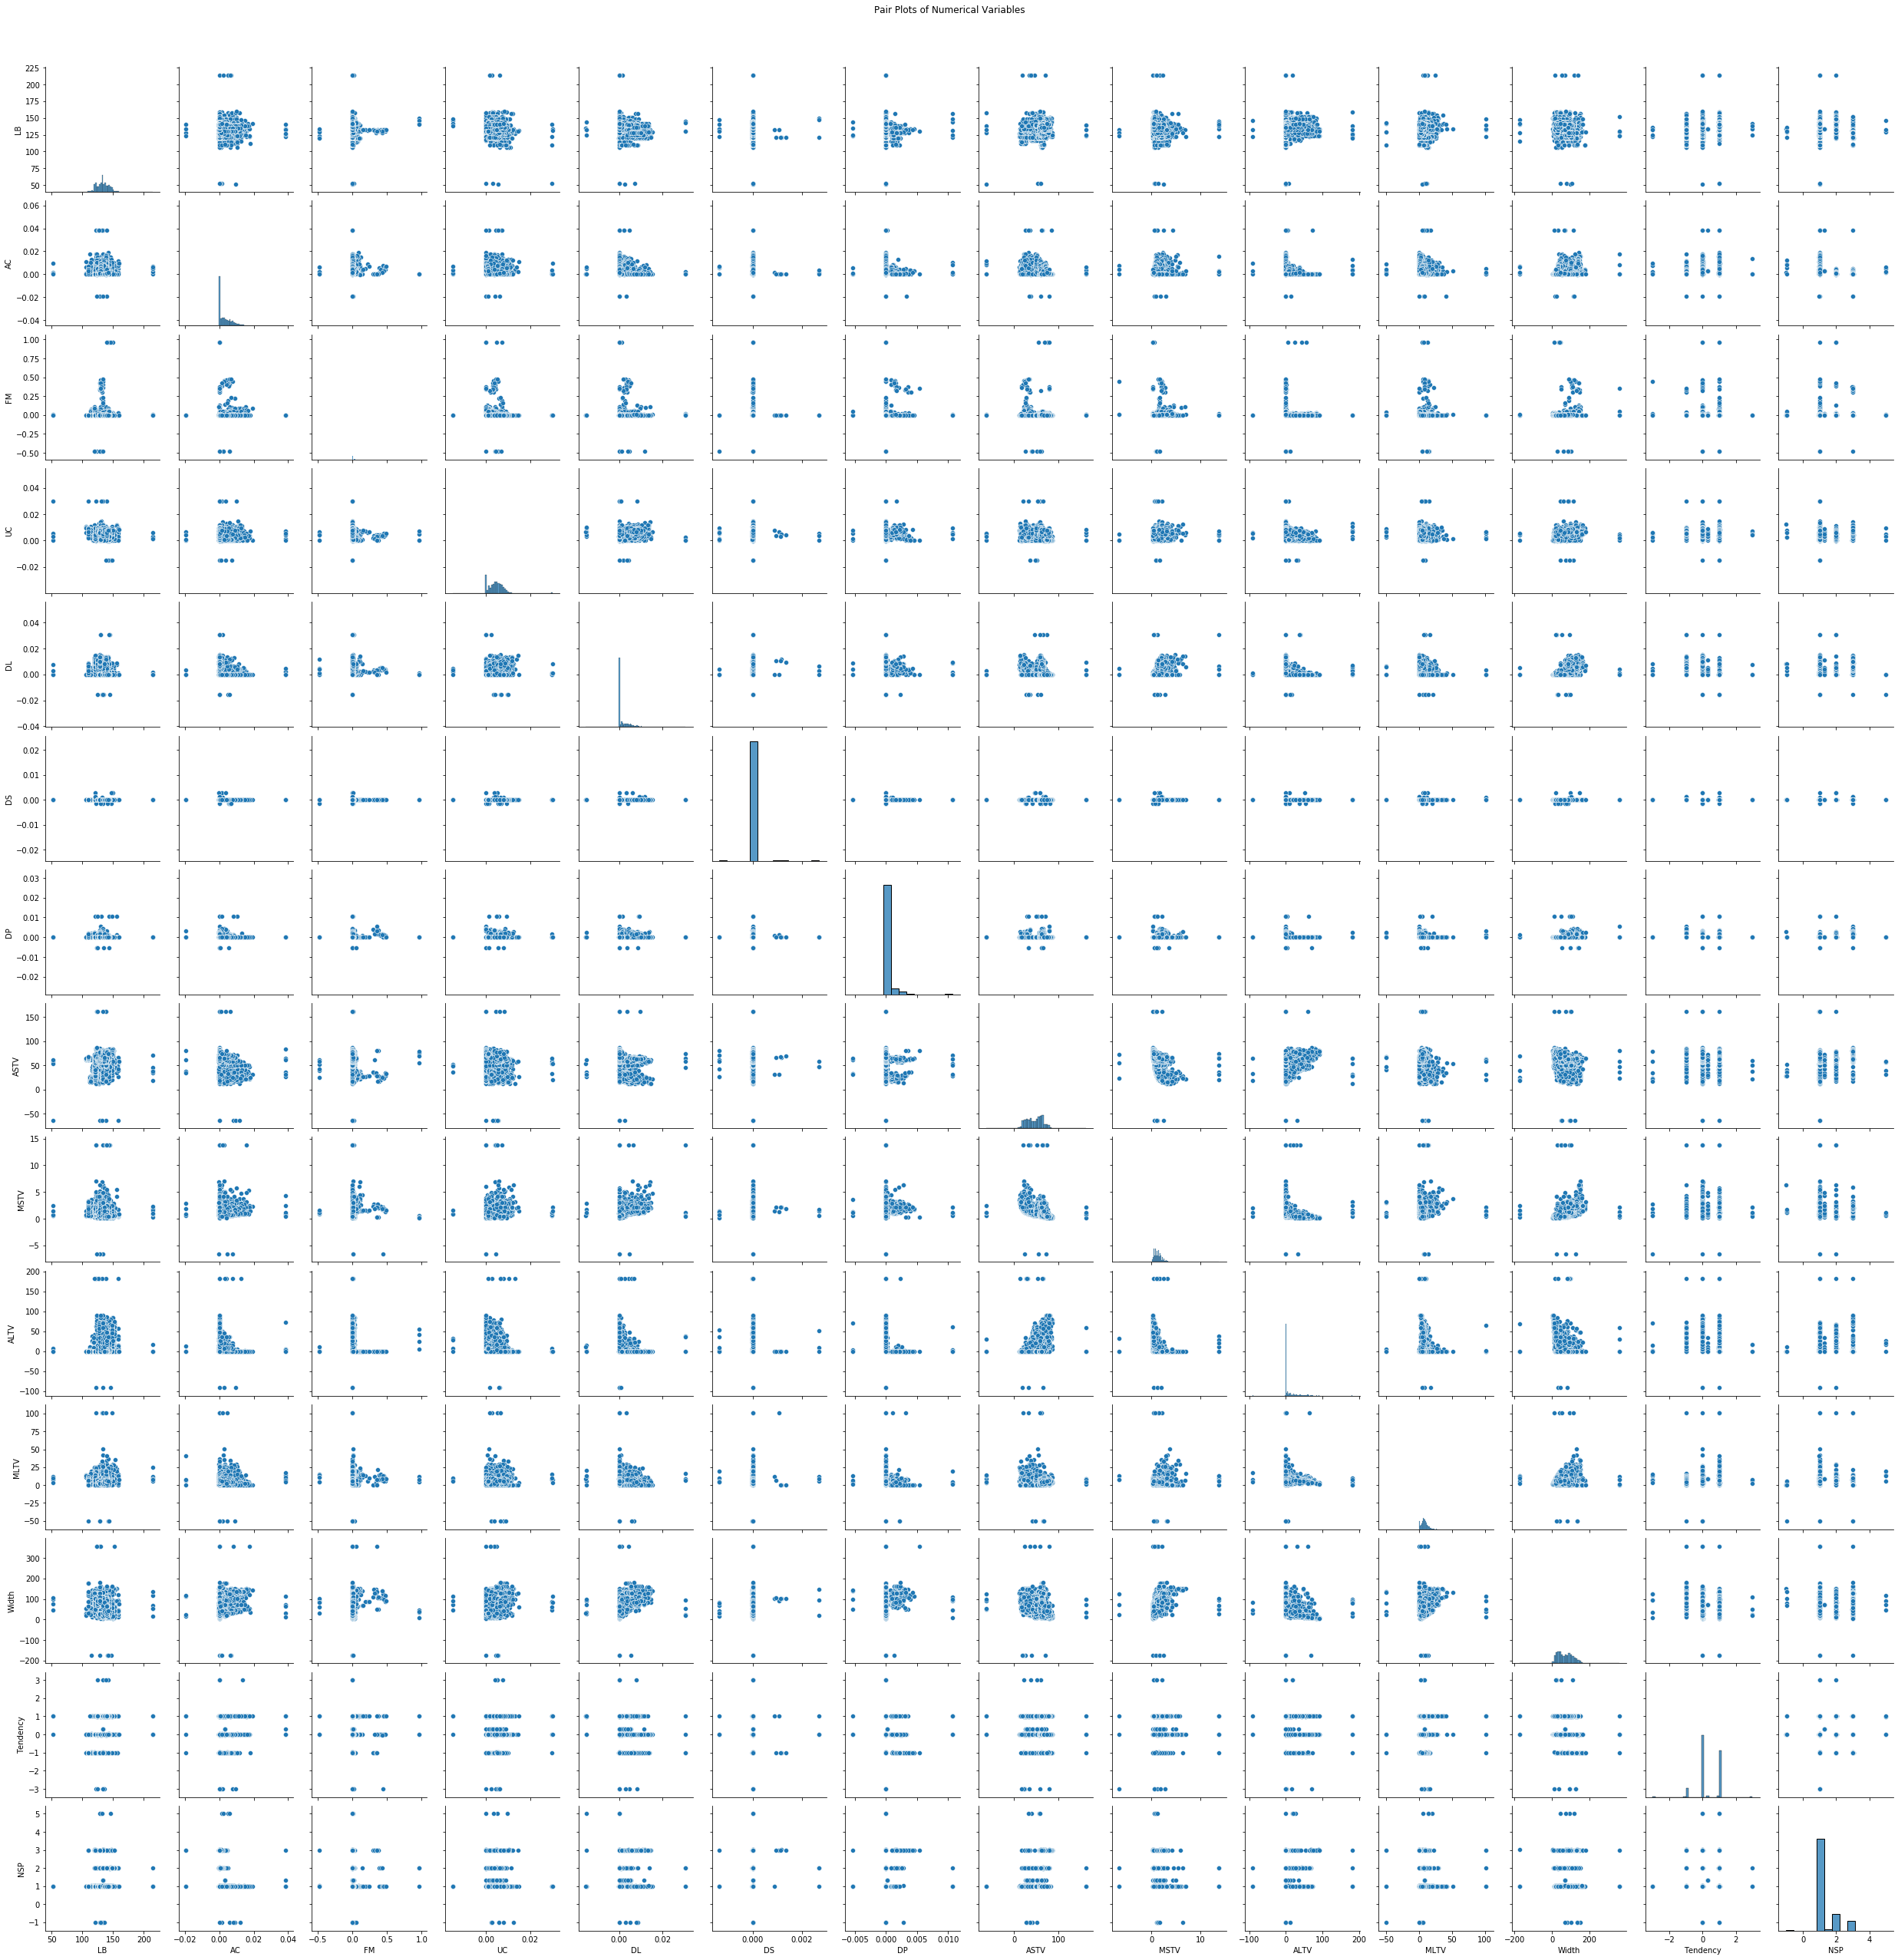

In [21]:
# 5.4: Pair plots for deeper insights
sns.pairplot(df)
plt.suptitle("Pair Plots of Numerical Variables", y=1.02)
plt.show()

In [22]:
# Step 6: Pattern Recognition and Insights

# 6.1: Identify correlations between variables
print("\nCorrelation Matrix:")
print(df.corr())


Correlation Matrix:
                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.062839  0.018776 -0.166201 -0.126536 -0.005438   
AC       -0.062839  1.000000  0.009432  0.071863 -0.093196 -0.033101   
FM        0.018776  0.009432  1.000000 -0.053226  0.009718  0.029899   
UC       -0.166201  0.071863 -0.053226  1.000000  0.190128 -0.006922   
DL       -0.126536 -0.093196  0.009718  0.190128  1.000000  0.058430   
DS       -0.005438 -0.033101  0.029899 -0.006922  0.058430  1.000000   
DP       -0.047724 -0.083277  0.121274  0.070501  0.144940  0.004285   
ASTV      0.241857 -0.230439 -0.032691 -0.181161 -0.069361  0.008425   
MSTV     -0.169561  0.133649  0.017055  0.189406  0.410102  0.016077   
ALTV      0.210446 -0.271041 -0.011936 -0.227304 -0.186967 -0.004392   
MLTV     -0.003457 -0.104875 -0.006237 -0.049351 -0.165198  0.034349   
Width    -0.118425  0.234735  0.097204  0.107159  0.408664  0.040832   
Tendency  0.236864  0.031977 -0.018338 -0.0

Highly Correlated Feature Pairs (|corr| > 0.7):


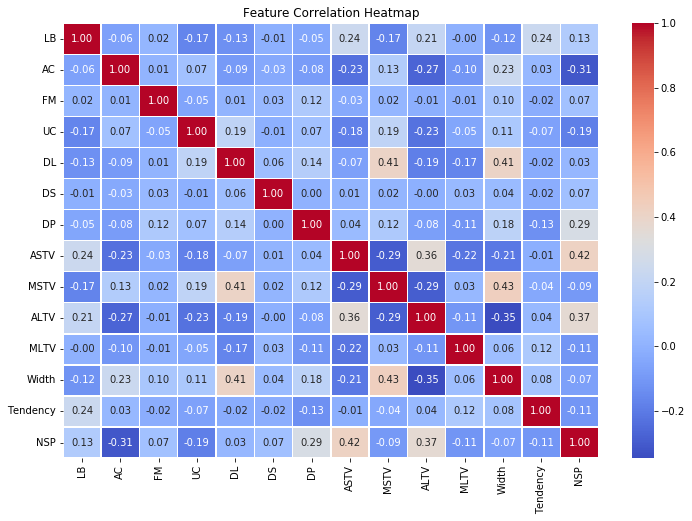

In [24]:
correlation_matrix = df.corr()

# Identify highly correlated pairs (absolute correlation > 0.7)
high_corr_pairs = [
    (col1, col2, correlation_matrix.loc[col1, col2])
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.7
]

# Print highly correlated pairs
print("Highly Correlated Feature Pairs (|corr| > 0.7):")
for col1, col2, corr in high_corr_pairs:
    print(f"{col1} - {col2}: {corr:.2f}")

# Correlation heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Time-based trend analysis (if applicable)
if "Time" in df.columns:
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x="Time", y="LB", label="Baseline FHR", marker="o")
    sns.lineplot(data=df, x="Time", y="AC", label="Accelerations", marker="o")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Trend Analysis of LB and AC Over Time")
    plt.legend()
    plt.show()




In [26]:
print("\nConclusion:")
print("1. ASTV and ALTV have a strong correlation (0.85), indicating they measure similar variability.")
print("2. LB (Baseline FHR) has weak correlations with most variables, meaning it behaves independently.")
print("3. DS, DP, and DL show weak correlations with other features, suggesting they represent distinct fetal health states.")
print("4. No temporal trends were identified, as no explicit time-based variable was found in the dataset.")


Conclusion:
1. ASTV and ALTV have a strong correlation (0.85), indicating they measure similar variability.
2. LB (Baseline FHR) has weak correlations with most variables, meaning it behaves independently.
3. DS, DP, and DL show weak correlations with other features, suggesting they represent distinct fetal health states.
4. No temporal trends were identified, as no explicit time-based variable was found in the dataset.
